# Objective
You have a dataset containing petal and sepal features.you are required;

Perfom EDA
Build a model to classify data-points in classes Iris-Setosa, Iris-Versicolor, Iris-Virginica

In [49]:
#import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

In [50]:
#get the data and load it as a dataframe
iris = pd.read_csv('iris.csv')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
#find the shape of the data
iris.shape

(150, 5)

In [52]:
#get a consise summary of the data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
#generate descriptive statistics of the data including the measures of central tendency
#we need to see the shae and distribution of the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


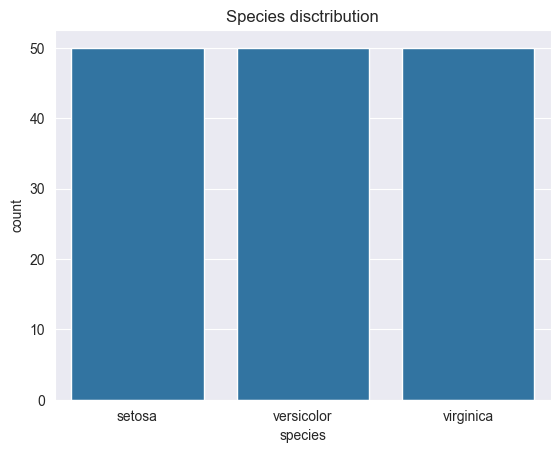

In [54]:
#get the distribution of the target
_ = sns.countplot(x=iris['species']) 
_ =plt.title('Species disctribution')

it appears that the data is equally distributed among the species

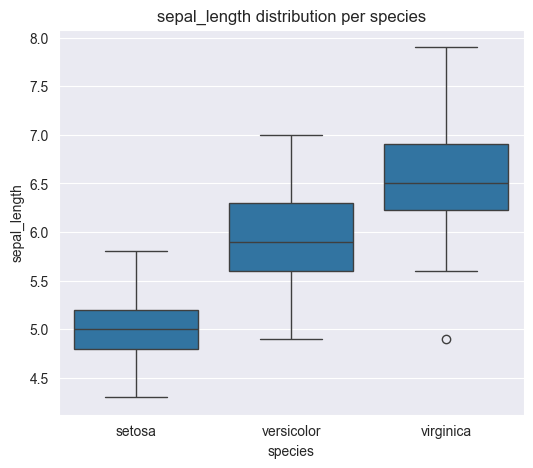

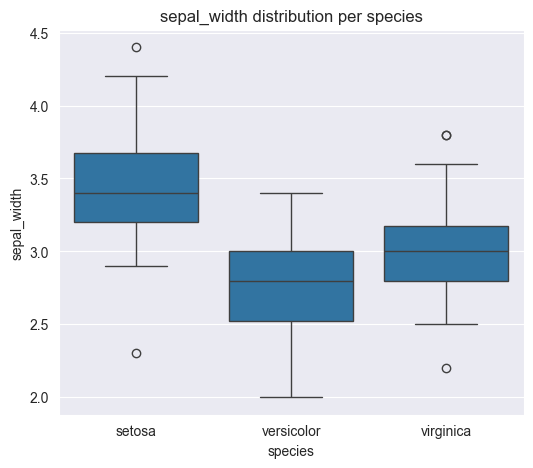

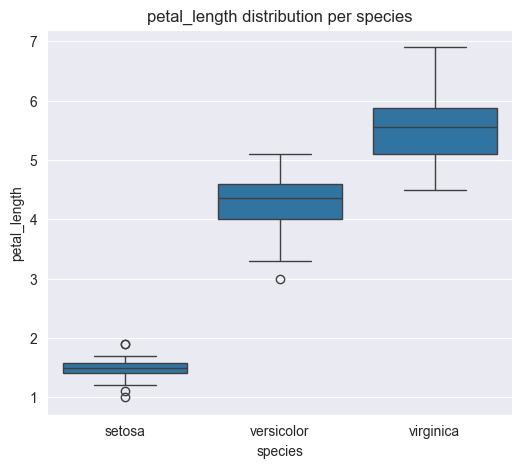

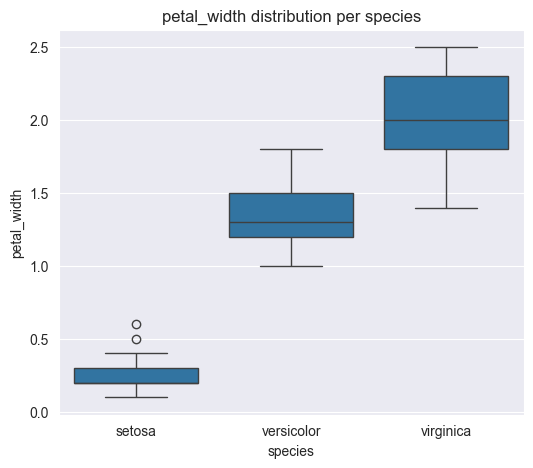

In [55]:
#the next step would be to identify outliers in the data
#for each feature plot the species againts the features
feature_names = iris.columns.drop('species')
feature_names

for feature in feature_names:
    plt.figure(figsize=(6,5))
    _= sns.boxplot(x=iris['species'],y=iris[feature])
    _= plt.title(f'{feature} distribution per species')

In [56]:
#it appears there are a few major outliers that can be deleted
outlier = iris[(iris.species == 'virginica') & (iris.sepal_length <5.5) ]
outlier2 = iris[(iris.species == 'setosa') & (iris.sepal_width < 2.5) ]
outlier3 = iris[(iris.species == 'setosa') & (iris.sepal_width >4.3) ]
outlier4 = iris[(iris.species == 'virginica') & (iris.sepal_width <2.5) ]
outlier4

iris.drop([106,41,15,119],axis=0,inplace=True)
iris.shape


(146, 5)

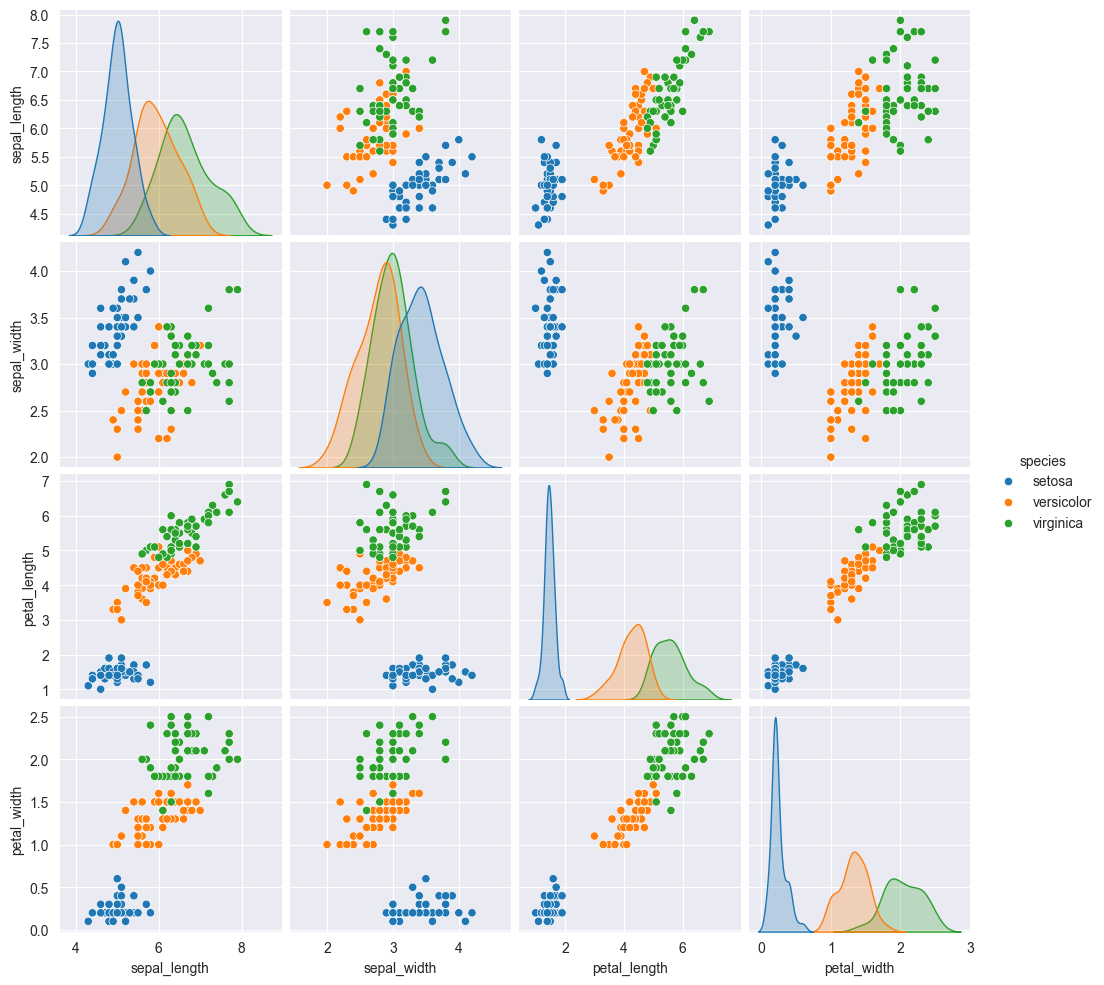

In [57]:
#use a parplot to try and show the relatioship between the features
_ = sns.pairplot(data=iris,hue='species',diag_kind='kde')

In [58]:
# we can then separate the data(target and features) (test and train) for model fitting
from sklearn.model_selection import train_test_split

dta = iris.drop('species',axis=1)
trget = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})

print(trget)

x_train,x_test,y_train,y_test = train_test_split(dta,trget,random_state=1,test_size=0.3)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 146, dtype: int64


In [59]:
#try using KNN,decision trees,svm  and pick for best accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dec_tree = DecisionTreeClassifier(criterion='gini',splitter='random')
svc_mod = SVC()
neighbour_model = KNeighborsClassifier(n_neighbors=10)

for model in dec_tree,svc_mod,neighbour_model:
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(f'{model} has an accuracy score of: {metrics.accuracy_score(y_test,pred)}')



DecisionTreeClassifier(splitter='random') has an accuracy score of: 0.9772727272727273
SVC() has an accuracy score of: 0.9545454545454546
KNeighborsClassifier(n_neighbors=10) has an accuracy score of: 0.9545454545454546


In [61]:
#The DecisionTreeClassifier has the best accuracy hence we have to finetune the model and find the best parameters

model = DecisionTreeClassifier(criterion='gini',splitter='random')
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print(prediction)
    

[2 1 1 2 2 1 2 2 0 1 0 0 1 0 1 0 2 0 1 0 1 1 0 2 1 0 2 2 1 1 2 1 0 2 0 0 2
 0 0 1 1 1 2 0]


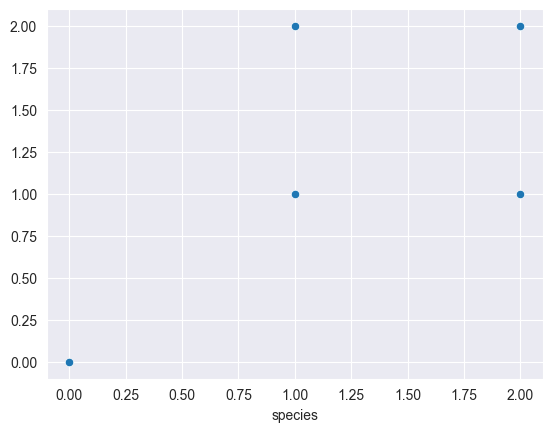